In [2]:
from decimal import Decimal
from papermodels.paper.pdf import load_pdf_annotations
from papermodels.datatypes.geometry_graph import GeometryGraph
from papermodels.datatypes.joist_models import (
    JoistArrayModel, 
    collector_trib_model
)

In [3]:
%matplotlib Inline

## 1. Create the graph

The graph is now the primary entry point. Unfortunately, I have not implemented plotting annotations from the graph yet. That will be coming soon.

TODO:

1. Parse trib areas from the PDF markup and include them in the frame loading
2. Plotting annotations from the graph
3. Implementing the ability to mark an origin on the PDF mark (for pages that do not line up)

In [4]:
graph = GeometryGraph.from_pdf_file("sketch_to_scale-w_manual_tag.pdf", scale=Decimal(1 / 72 * 4))
graph.assign_collector_behaviour(collector_trib_model, as_subelements=False)
les = graph.create_loaded_elements()

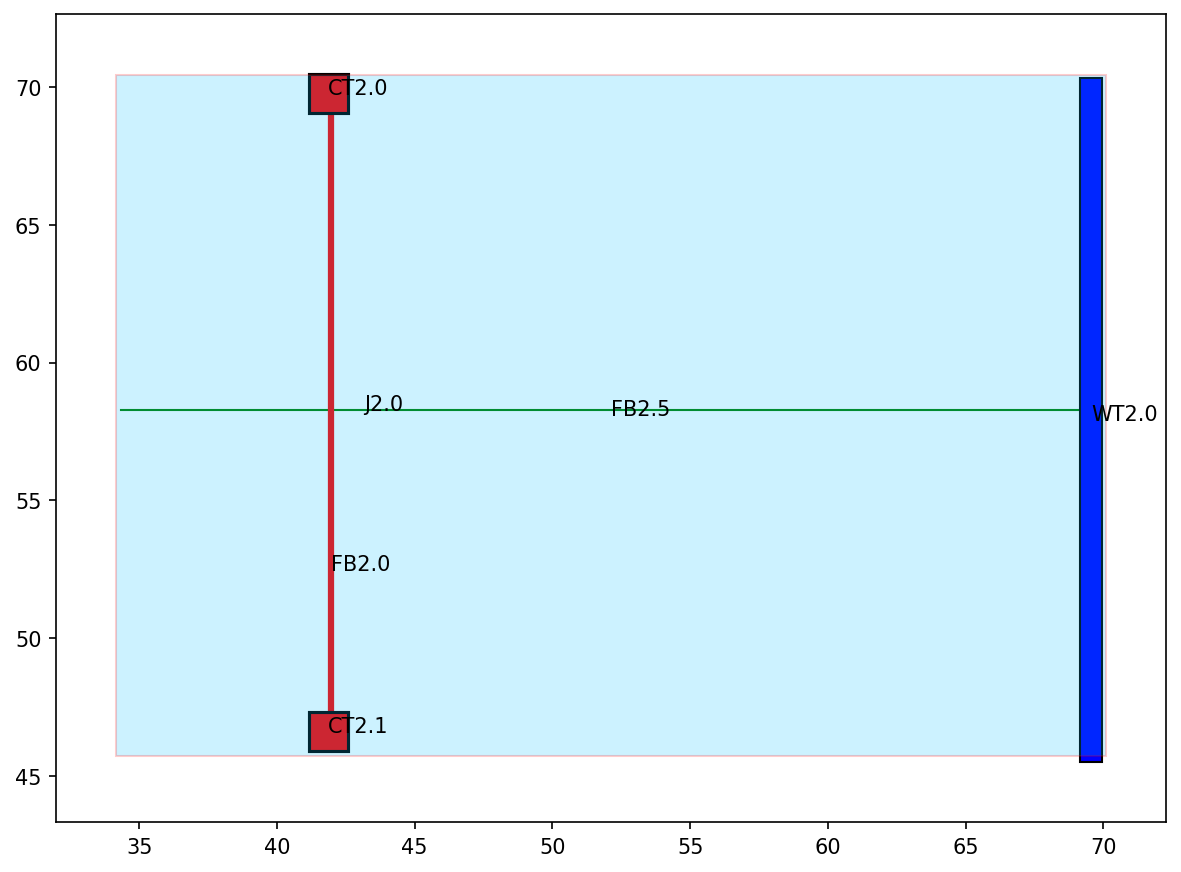

In [5]:
# Note: FB2.5 on page 2
#       FB1.14 on page 1
#       CB0.10 on page 0
# These have all been manually tagged in the PDF.
# Notice how they retain their manual tagging and
# that all other elements have been tagged "around" them.
graph.plot_annotations(2)

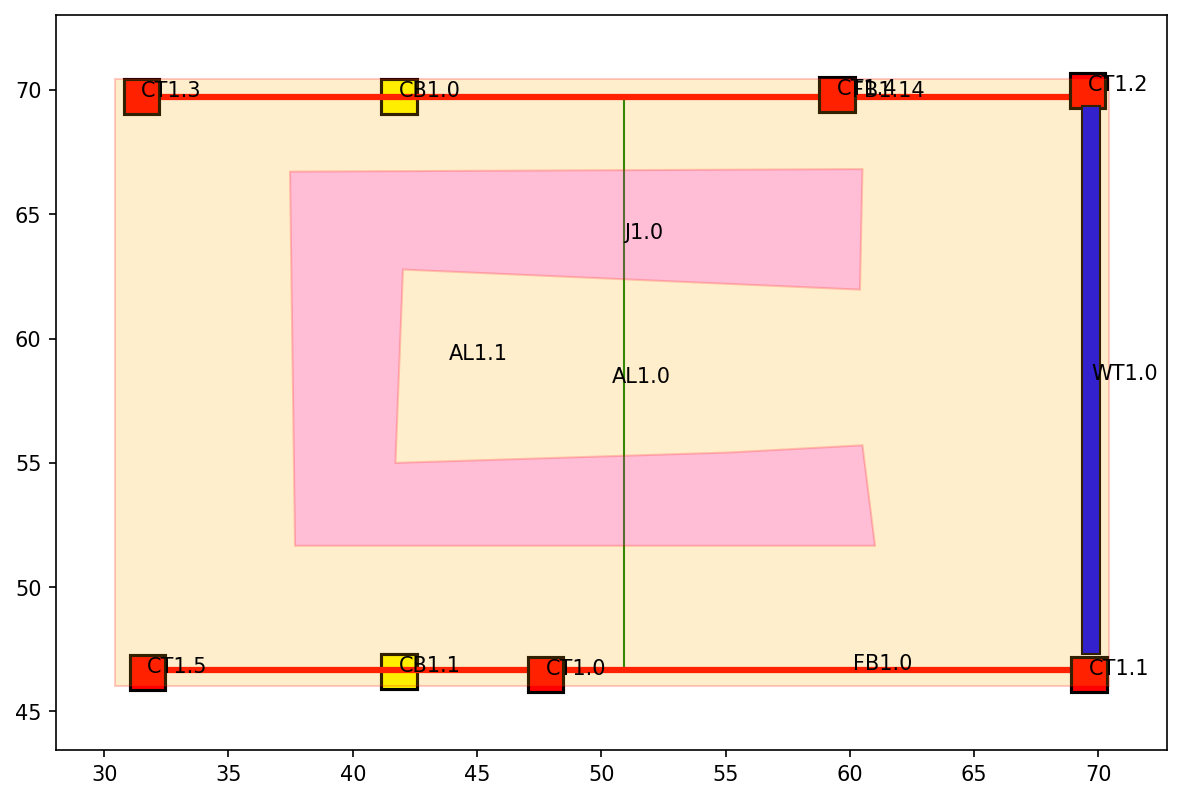

In [6]:
graph.plot_annotations(1)

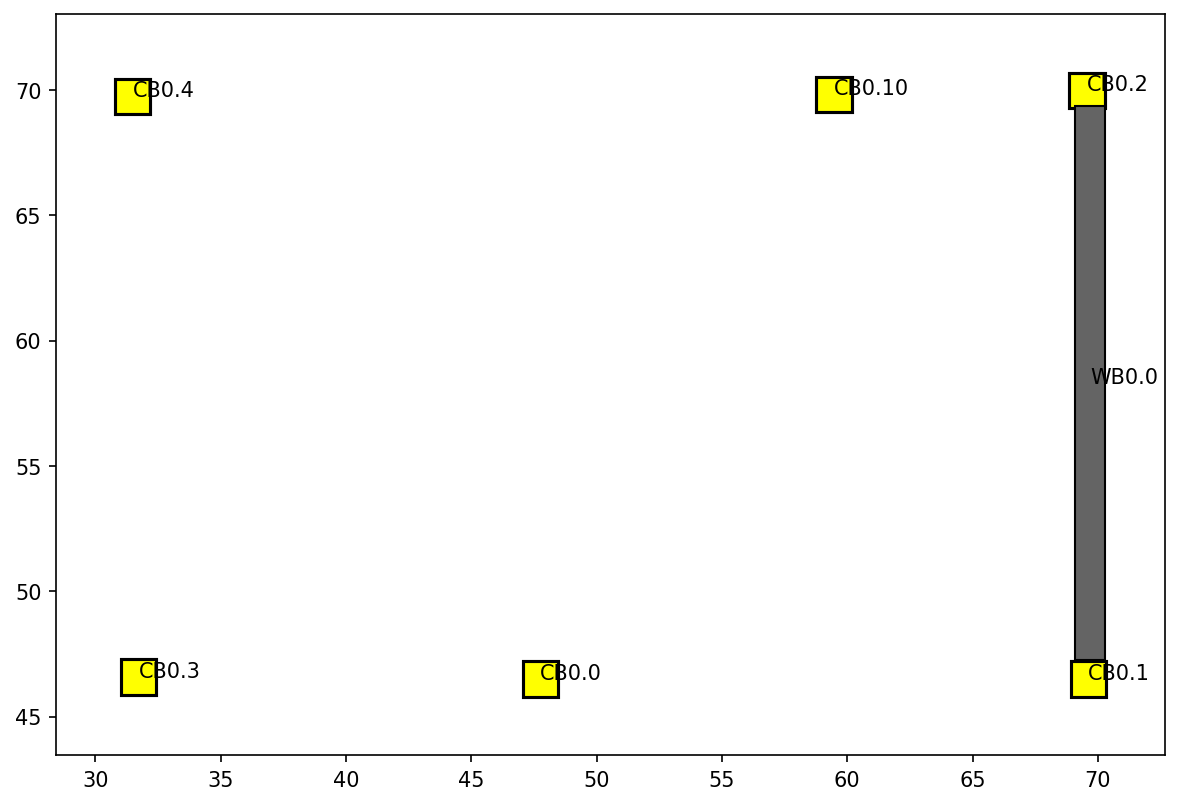

In [7]:
graph.plot_annotations(0)

## Export a tagged PDF

This PDF file can be saved to any location with any name. If no name/path is given then it will be saved to the same directory with the same filename as the original with "-tagged" appended to the name.

The exported PDF file has the assigned tags added as text elements to each annotation.

If you want to retain all existing tags, the exported file should become your NEW markup source file. If you then move geometry elements, no problems, they will retain their assigned tags. If you add new geometry elements, no problems, they will be named "around" the existing tags so that all tags are unique. If you delete tagged geometry elements, no problems, it does not change the other assigned tags.

In [8]:
# Review the file 'sketch_to_scale-w_manual_tag-tagged.pdf' to verify tags
# were added to the PDF
graph.export_tagged_pdf()

## Export the `LoadedElement`s

In [10]:
import pathlib
models_dir = pathlib.Path() / "models"
models_dir.mkdir(exist_ok=True, parents=True)
for tag, le in les.items():
    with open(models_dir / f"{tag}.toml", 'wb') as file:
        le.dump_toml(file)